In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import csv
import math
import matplotlib.pyplot as plt

In [ ]:
!pip install python-louvain
import community.community_louvain as cl

In [ ]:
import community
import matplotlib.cm as cm

## Расчёт уровня инфраструктурной обеспеченности (F). Список критериев:
1. Обеспеченность местами в школах
2. Обеспеченность местами в дс
3. Наличие ФАП
4. Наличие банкомата
5. ...

F = a*x1 + b*x2 + c*x3...
где a, b, c... - коэффициент влияния направления (задаётся по желанию, в данном случае равны 1)
x - показатель

In [ ]:
# Чтение данных из файла или создание данных
data = pd.read_csv('infrastructure_2.csv', skiprows=[0], delimiter=';', names=['name','school','kindergarden','post','library','culture','atm','health','port','airport','shop', 'pvz', 'gas', 'mfc'])

df_inf = pd.DataFrame(data)

# Нормализация данных

def normalize_columns(df_inf, columns=None):
    if not columns:
        columns = df_inf.columns[1:] # все колонки кроме первой

    for col in columns:
        max_value = float(df_inf[col].max())
        min_value = float(df_inf[col].min())

        df_inf[col] = (df_inf[col].astype('float') - min_value) / (max_value - min_value)
    return df_inf


# Нормализуем данные
normalized_df_inf = normalize_columns(df_inf)

# Суммируем нормализованные значения
summed_values = normalized_df_inf.iloc[:, 1:].sum(axis=1) #Все строки и колонки кроме первых

# Добавляем итоговую сумму к исходному DataFrame
result_df_inf = df_inf.copy()
result_df_inf['ind'] = summed_values

result_df_inf = result_df_inf[[result_df_inf.columns[0], result_df_inf.columns[-1]]] #Выбираем только столбцы с названием и итоговой оценкой

df_towns = pd.read_csv('main_towns.csv', delimiter = ';') #Читаем файл с опорными городами
combined_df = pd.concat([result_df_inf, df_towns])

# Запись результата в файл
#combined_df.to_csv("result_inf_1.csv", sep=';', index=False)

#print(combined_df)
combined_df.sort_values(by='ind', ascending=False)

,name,ind
9,Красноярск,15.000000
7,Норильск,15.000000
6,Новый Уренгой,15.000000
4,Магадан,15.000000
3,Якутск,15.000000
1,Архангельск,15.000000
10,Усинск,14.000000
0,Нарьян-Мар,14.000000
2,Воркута,14.000000
5,Тарко-Сале,13.000000


In [ ]:
# Сортируем combined_df по столбцу 'ind' в порядке убывания
combined_df_sorted = combined_df.sort_values(by='ind', ascending=False)
combined_df_sorted

,name,ind
9,Красноярск,15.000000
7,Норильск,15.000000
6,Новый Уренгой,15.000000
4,Магадан,15.000000
3,Якутск,15.000000
1,Архангельск,15.000000
10,Усинск,14.000000
0,Нарьян-Мар,14.000000
2,Воркута,14.000000
5,Тарко-Сале,13.000000


Расчёт функции времени (T). Виды транспорта:
1. Автомобильный (car)
2. Авиационный (plane)
3. Водный_теплоход (water_ship)
4. Водный_личный (water_boat)
5. Зимний (winter)

2 времени года лето (warm), зима (cold). Для каждого отдельный расчёт. Коэффициенты риска меняются (задаются самостоятельно, отдельно для каждого эксперимента)

T = t * an
an - коэффициент риска транспорта (ratio)


## **Расчёт тёплого времени года**

In [ ]:
#Данные на всякий случай сохранить в кодировке utf-8 (через блокнот)
car_ratio=1.1
plane_ratio=1.2
water_ship_ratio=1.2
water_boat_ratio=1.3

# Чтение данных из CSV-файлаw
df = pd.read_csv("warm_time_2.csv", delimiter=';', names=['depart','arrival','car','plane','water_ship','water_boat']) #Перед этим в экселе установить числовой формат и убрвть первую строку с названиями столбцов

#Замена , на .
df['car'] = df['car'].apply(lambda x: x.replace(',', '.')).astype('float')
df['plane'] = df['plane'].apply(lambda x: x.replace(',', '.')).astype('float')
df['water_ship'] = df['water_ship'].apply(lambda x: x.replace(',', '.')).astype('float')
df['water_boat'] = df['water_boat'].apply(lambda x: x.replace(',', '.')).astype('float')
print(df)

#Умножение по столбцам на коэффициенты риска
df['car'] = df['car'].apply(lambda x: car_ratio*x)
df['plane'] = df['plane'].apply(lambda x: plane_ratio*x)
df['water_ship'] = df['water_ship'].apply(lambda x: water_ship_ratio*x)
df['water_boat'] = df['water_boat'].apply(lambda x: water_boat_ratio*x)

# Запись результата в файл
#df.to_csv("result_time.csv", sep=';', index=False)

             depart     arrival  car  plane  water_ship  water_boat
0           Хатанга      Кресты  0.2    0.0         0.0       0.560
1   Левинские Пески     Дудинка  0.0    0.0         0.0       0.284
2   Левинские Пески    Потапово  0.0    0.0         0.0       3.457
3   Левинские Пески      Диксон  0.0    0.0         0.0      20.383
4   Левинские Пески      Караул  0.0    0.0         0.0       5.446
..              ...         ...  ...    ...         ...         ...
75        Казанцево      Мунгуй  0.0    0.0         0.0       3.663
76            Новая     Жданиха  0.0    0.0         0.0       2.732
77            Новая        Хета  0.0    0.0         0.0       2.030
78          Жданиха        Хета  0.0    0.0         0.0       4.762
79         Газ-Сале  Тибей-Сале  0.0    0.0         0.0       1.220

[80 rows x 6 columns]


In [ ]:
# Чтение данных из файла
df_time = df

# Получение минимальных значений, игнорируя 0 и первые два столбца
results = df.iloc[:, 2:].replace(0, np.nan).apply(lambda x: x.min(), axis=1)

#Сохранение результатов в таблицу
new_df = df_time.copy()
new_df['min'] = results

#Выбор столбцов с названием н.п. и минимальным временем
min_time_warm = new_df[['depart', 'arrival','min']]

#Заполнение пустых строк нулями
min_time_warm['min'] = min_time_warm['min'].fillna(0)

# Печать результатов и их сохранение в файл
print(min_time_warm)

             depart     arrival      min
0           Хатанга      Кресты   0.2200
1   Левинские Пески     Дудинка   0.3692
2   Левинские Пески    Потапово   4.4941
3   Левинские Пески      Диксон  26.4979
4   Левинские Пески      Караул   7.0798
..              ...         ...      ...
75        Казанцево      Мунгуй   4.7619
76            Новая     Жданиха   3.5516
77            Новая        Хета   2.6390
78          Жданиха        Хета   6.1906
79         Газ-Сале  Тибей-Сале   1.5860

[80 rows x 3 columns]


<ipython-input-8-8bd27dc0b19a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_time_warm['min'] = min_time_warm['min'].fillna(0)


## Расчёт гравитационной силы (G)

In [ ]:
#Чтение файлов с уровнем инфраструктурной обеспеченности и данными по времени
settl = dict(zip(combined_df['name'], combined_df['ind'])) #Не забыть менять названия файлов, удалить строку в блокноте
connect = min_time_warm.values.tolist()

# Преобразование данных и вычисление
Gravity = []
for row in connect:
    try:
        F1 = float(settl[row[0]])
        F2 = float(settl[row[1]])
        r = float(row[2])
        if r == 0:
            LocalGravity = 0
        else:
            LocalGravity = (F1 - F2) / (r ** 2)  # Убрать модуль, чтобы граф стал направленным, тогда можно анализировать что к чему притягивается
        Gravity.append([row[0], row[1], LocalGravity])
    except KeyError:
        continue  # Пропускаем строки, если ключ не найден
#Сохранение данных в файл csv
local_gravity = pd.DataFrame(Gravity, columns=['settl1', 'settl2','LocalGravity'])
print(local_gravity)

             settl1      settl2  LocalGravity
0           Хатанга      Кресты     94.795356
1   Левинские Пески     Дудинка    -69.694775
2   Левинские Пески    Потапово     -0.147712
3   Левинские Пески      Диксон     -0.004666
4   Левинские Пески      Караул     -0.084125
..              ...         ...           ...
73        Казанцево      Мунгуй      0.000000
74            Новая     Жданиха      0.000000
75            Новая        Хета     -0.071795
76          Жданиха        Хета     -0.013047
77         Газ-Сале  Тибей-Сале      2.130688

[78 rows x 3 columns]


In [ ]:
# Группируем дублирующиеся строки
local_gravity = local_gravity.groupby(['settl1', 'settl2'])['LocalGravity'].sum().reset_index()

# Получаем уникальные названия населённых пунктов
unique_settlements = sorted(list(set(local_gravity['settl1']).union(set(local_gravity['settl2']))))

# Формируем полный набор комбинаций
full_index = pd.MultiIndex.from_product([unique_settlements, unique_settlements], names=['settl1', 'settl2'])

# Приводим данные к полной сетке комбинаций
local_gravity_full = local_gravity.set_index(['settl1', 'settl2']).reindex(full_index, fill_value=0).reset_index()

# Преобразуем в матрицу
matrix = local_gravity_full.pivot(index='settl1', columns='settl2', values='LocalGravity').fillna(0)

# Проверка размера матрицы
print(matrix.shape)  # Должно быть (35, 35)

# Сохраняем матрицу в формате .pkl
matrix.to_pickle('gravity_matrix_warm_2.pkl')

(39, 39)


In [ ]:
matrix

settl2,Антипаюта,Байкаловск,Волочанка,Воронцово,Газ-Сале,Гыда,Диксон,Дудинка,Жданиха,Казанцево,...,Тазовский,Тарко-Сале,Тибей-Сале,Толька,Тухард,Усть-Авам,Усть-Порт,Хантайское Озеро,Хатанга,Хета
settl1,,,,,,,,,,,,,,,,,,,,,
Антипаюта,0.000000,0.000000,0.000000,0.000000,0.000000,-0.056084,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
Байкаловск,0.000000,0.000000,0.000000,-1.660821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
Волочанка,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
Воронцово,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
Газ-Сале,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,2.130688,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
Гыда,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
Диксон,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008622,0.000000,0.010957,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
Дудинка,0.000000,6.575310,1.413153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.306669,...,0.0,0.000000,0.000000,0.0,35.35859,3.250502,33.454949,4.383108,0.0,0.000000
Жданиха,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,-0.013047


## Создание матрицы времени

In [ ]:
import pandas as pd
import numpy as np
import pickle

# Чтение данных из CSV файла с указанием правильного разделителя
df_matrix = min_time_warm
print(df_matrix.columns)

Index(['depart', 'arrival', 'min'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import pickle

# Проверка наличия нужных столбцов
if not all(col in df_matrix.columns for col in ['depart', 'arrival', 'min']):
    print("Не все нужные столбцы присутствуют в CSV!")
else:
    # Получаем уникальные названия населённых пунктов
    unique_places = sorted(set(df_matrix['depart'].unique()) | set(df_matrix['arrival'].unique()))

    # Создаём пустую квадратную матрицу размером len(unique_places) x len(unique_places)
    matrix = np.zeros((len(unique_places), len(unique_places)))

    # Заполняем матрицу значениями из DataFrame
    for index, row in df_matrix.iterrows():
        i = unique_places.index(row['depart'])
        j = unique_places.index(row['arrival'])

        # Добавляем значение времени в обе стороны (если нет ограничений на направление)
        matrix[i][j] = row['min']
        matrix[j][i] = row['min']  # Если направления не симметричны, то закомментируйте эту строку

    # Преобразуем матрицу в DataFrame с индексами и заголовками
    result_df = pd.DataFrame(matrix, columns=unique_places, index=unique_places)

    # Сохраняем результат в новый файл в формате Pickle
    with open('result_matrix_warm_ynao_kras.pkl', 'wb') as file:
        pickle.dump(result_df, file)
result_df

,Антипаюта,Байкаловск,Волочанка,Воронцово,Газ-Сале,Гыда,Диксон,Дудинка,Жданиха,Казанцево,...,Тарко-Сале,Тибей-Сале,Толька,Тухард,Тюмень,Усть-Авам,Усть-Порт,Хантайское Озеро,Хатанга,Хета
Антипаюта,0.000,0.000,0.000,0.000,0.0000,1.596,0.0000,0.0000,0.0000,0.0000,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0000,0.000,0.0000,0.0000
Байкаловск,0.000,0.000,0.000,0.672,0.0000,0.000,0.0000,1.0440,0.0000,0.0000,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0000,0.000,0.0000,0.0000
Волочанка,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,2.1720,0.0000,0.0000,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0000,0.000,0.0000,0.0000
Воронцово,0.000,0.672,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0000,0.000,0.0000,0.0000
Газ-Сале,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.00,1.586,0.000,0.000,0.0,0.0,0.0000,0.000,0.0000,0.0000
Гыда,1.596,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0000,0.000,0.0000,0.0000
Диксон,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,26.8671,0.0000,20.8780,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0000,0.000,0.0000,0.0000
Дудинка,0.000,1.044,2.172,0.000,0.0000,0.000,26.8671,0.0000,0.0000,5.9891,...,0.00,0.000,0.000,0.438,0.0,2.4,0.4464,1.224,0.0000,0.0000
Жданиха,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0000,0.000,1.0738,6.1906
Казанцево,0.000,0.000,0.000,0.000,0.0000,0.000,20.8780,5.9891,0.0000,0.0000,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0000,0.000,0.0000,0.0000


## Создание графа и его анализ

### Граф по G

In [ ]:
# Чтение CSV файла
df_row = local_gravity

# Функция для обработки строк
def process_row(row):
    if row['LocalGravity'] < 0:
        # Меняем города местами и делаем значение положительным
        row['settl1'], row['settl2'] = row['settl2'], row['settl1']
        row['LocalGravity'] = abs(row['LocalGravity'])
    return row

# Применяем функцию ко всем строкам
df_row = df_row.apply(process_row, axis=1)
df_row.sort_values(by='LocalGravity', ascending=False)

,settl1,settl2,LocalGravity
56,Нарьян-Мар,Тельвиска,368.178830
59,Нарьян-Мар,Андег,312.751114
33,Шойна,Кия,251.114033
107,Ома,Снопа,133.959191
57,Нарьян-Мар,Макарово,114.794987
...,...,...,...
109,Ома,Индига,0.000000
29,Искателей,Пылемец,0.000000
28,Искателей,Устье,0.000000
19,Вижас,Чижа,0.000000


In [ ]:
#Нормирование значений
def normalize_column_and_sort_descending(df_norm, column_name):
    # Получаем минимальное и максимальное значения в колонке
    min_value = df_norm[column_name].min()
    max_value = df_norm[column_name].max()

    # Нормализуем значения от 0 до 100
    df_norm[column_name] = ((df_norm[column_name] - min_value) / (max_value - min_value)) * 100

    # Сортируем таблицу по нормализованному столбцу в порядке убывания
    df_norm.sort_values(by=column_name, ascending=False, inplace=True)

    return df_norm

df_norm = df_row
sorted_normalized_df = normalize_column_and_sort_descending(df_norm, 'LocalGravity')
print(sorted_normalized_df)

         settl1       settl2  LocalGravity
56   Нарьян-Мар    Тельвиска    100.000000
59   Нарьян-Мар        Андег     84.945437
33        Шойна          Кия     68.204365
107         Ома        Снопа     36.384273
57   Нарьян-Мар     Макарово     31.179138
..          ...          ...           ...
52       Мезень        Вижас      0.000000
53       Мезень  Нижняя Пеша      0.000000
54       Мезень       Индига      0.000000
116   Тельвиска    Искателей      0.000000
85   Нарьян-Мар        Устье      0.000000

[127 rows x 3 columns]


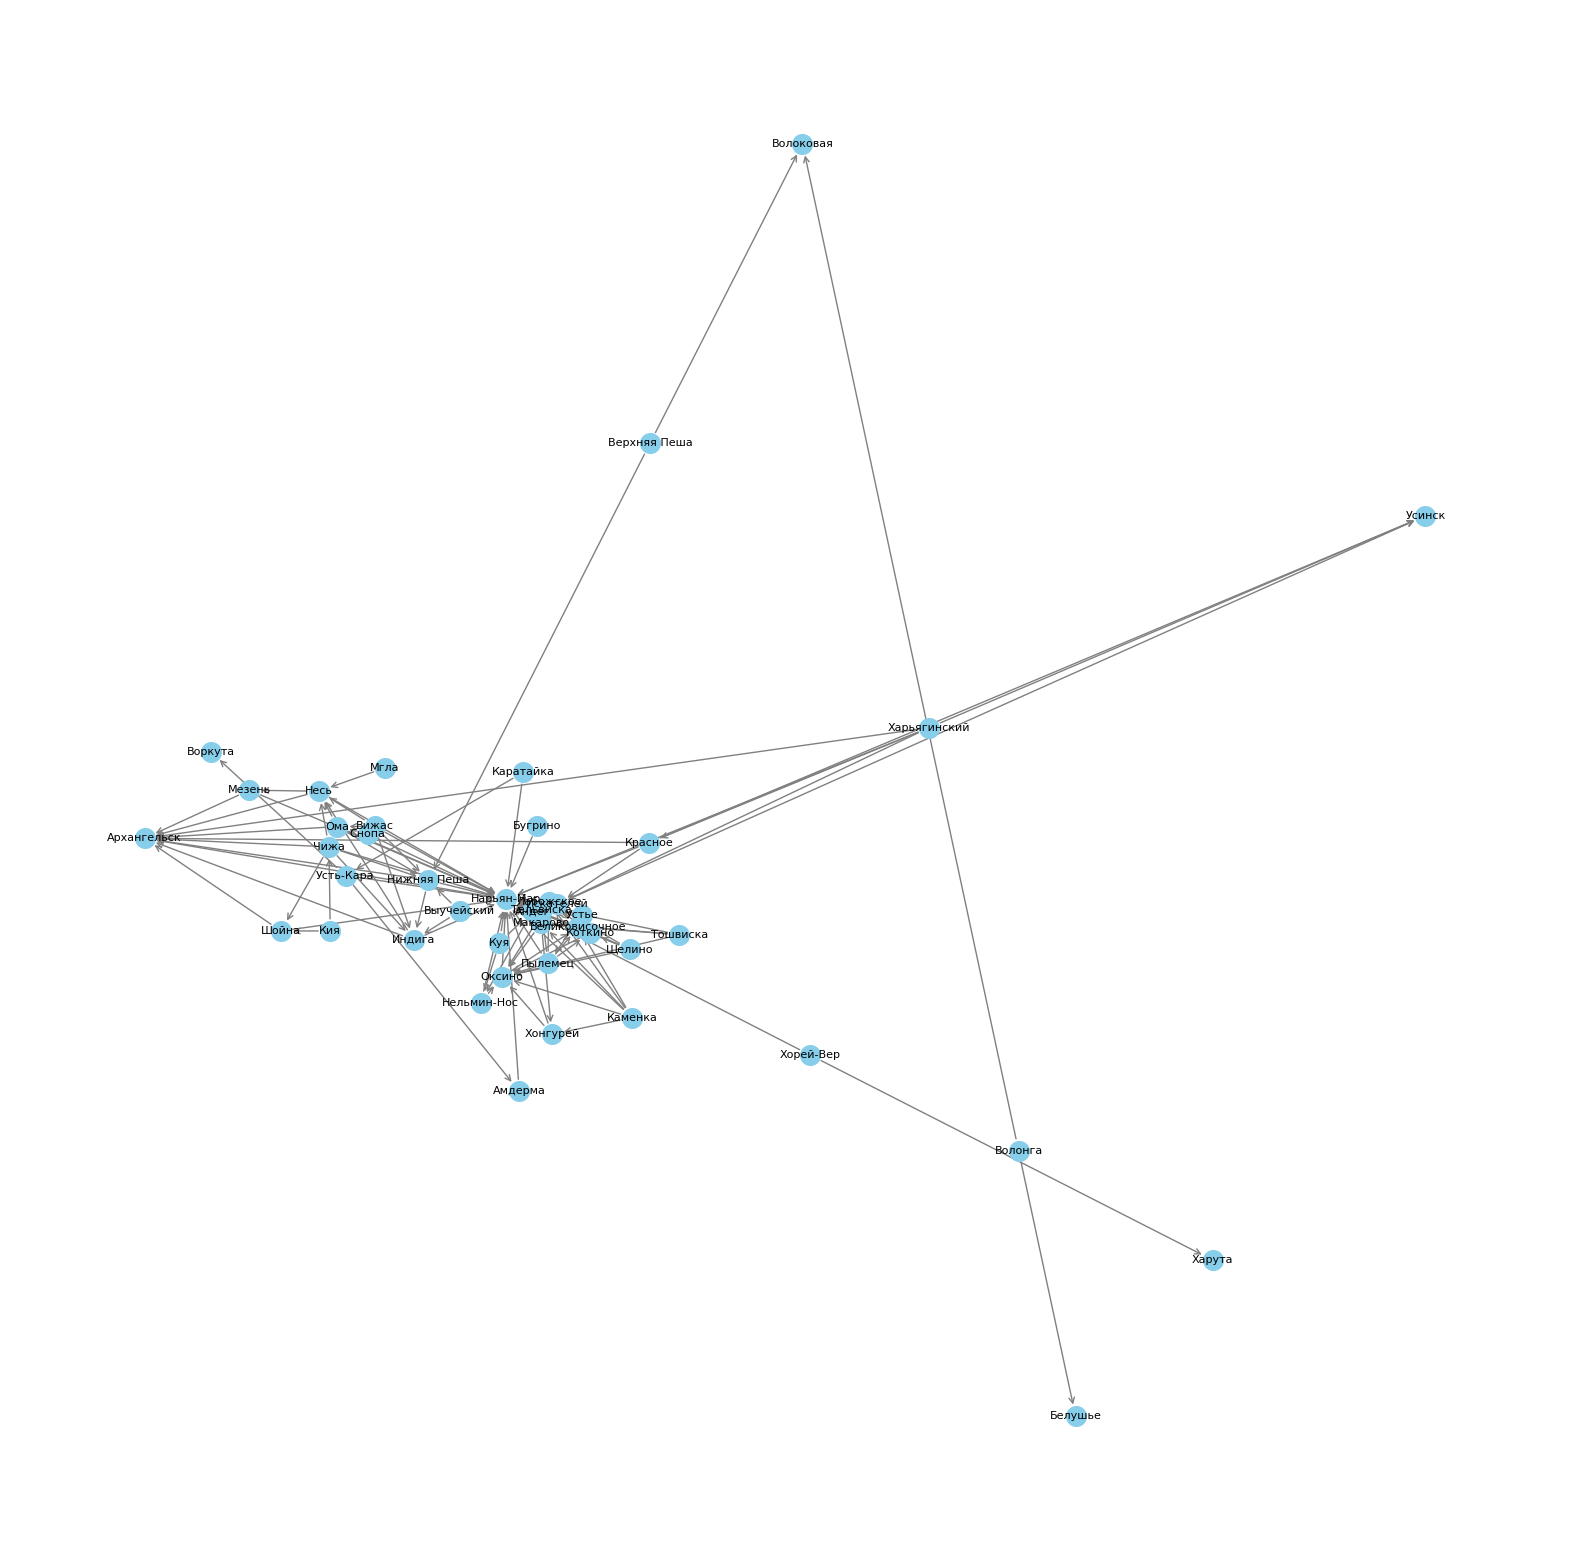

<Figure size 640x480 with 0 Axes>

In [ ]:
# Чтение данных
data_graph = sorted_normalized_df

# Создание направленного графа
G = nx.DiGraph()
for _, row in data_graph.iterrows():
    source = row['settl2']  # Начальная вершина
    target = row['settl1']  # Конечная вершина
    gravity_force = row['LocalGravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G.add_edge(source, target, weight=gravity_force)

# Настройка параметров для визуализации
pos = nx.spring_layout(G)  # Расположение узлов
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}  # Метки для рёбер
plt.figure(figsize=(20,20))  # Размер графика
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')  # Узлы
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowstyle='->', arrows=True)  # Рёбра
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)  # Метки рёбер

#Визуализация
plt.axis('off')
plt.show()
plt.savefig("graph_warm_G_mezen.png", format="png")

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
# Получение списка всех узлов
all_nodes = list(G.nodes())
# Подсчет количества входящих рёбер для каждого узла
incoming_counts = {}
for node in all_nodes:
    incoming_count = len(list(G.predecessors(node)))
    incoming_counts[node] = incoming_count

# Получение топ-10 узлов с наибольшим количеством входящих рёбер
top_10_nodes = Counter(incoming_counts).most_common(12)

# Печать результата
for node, count in top_10_nodes:
    print(f"{node}: {count}")

Нарьян-Мар: 31
Архангельск: 10
Оксино: 9
Великовисочное: 8
Несь: 5
Нижняя Пеша: 5
Лабожское: 4
Индига: 4
Ома: 3
Коткино: 3
Усинск: 3
Тельвиска: 2


### Граф по Т

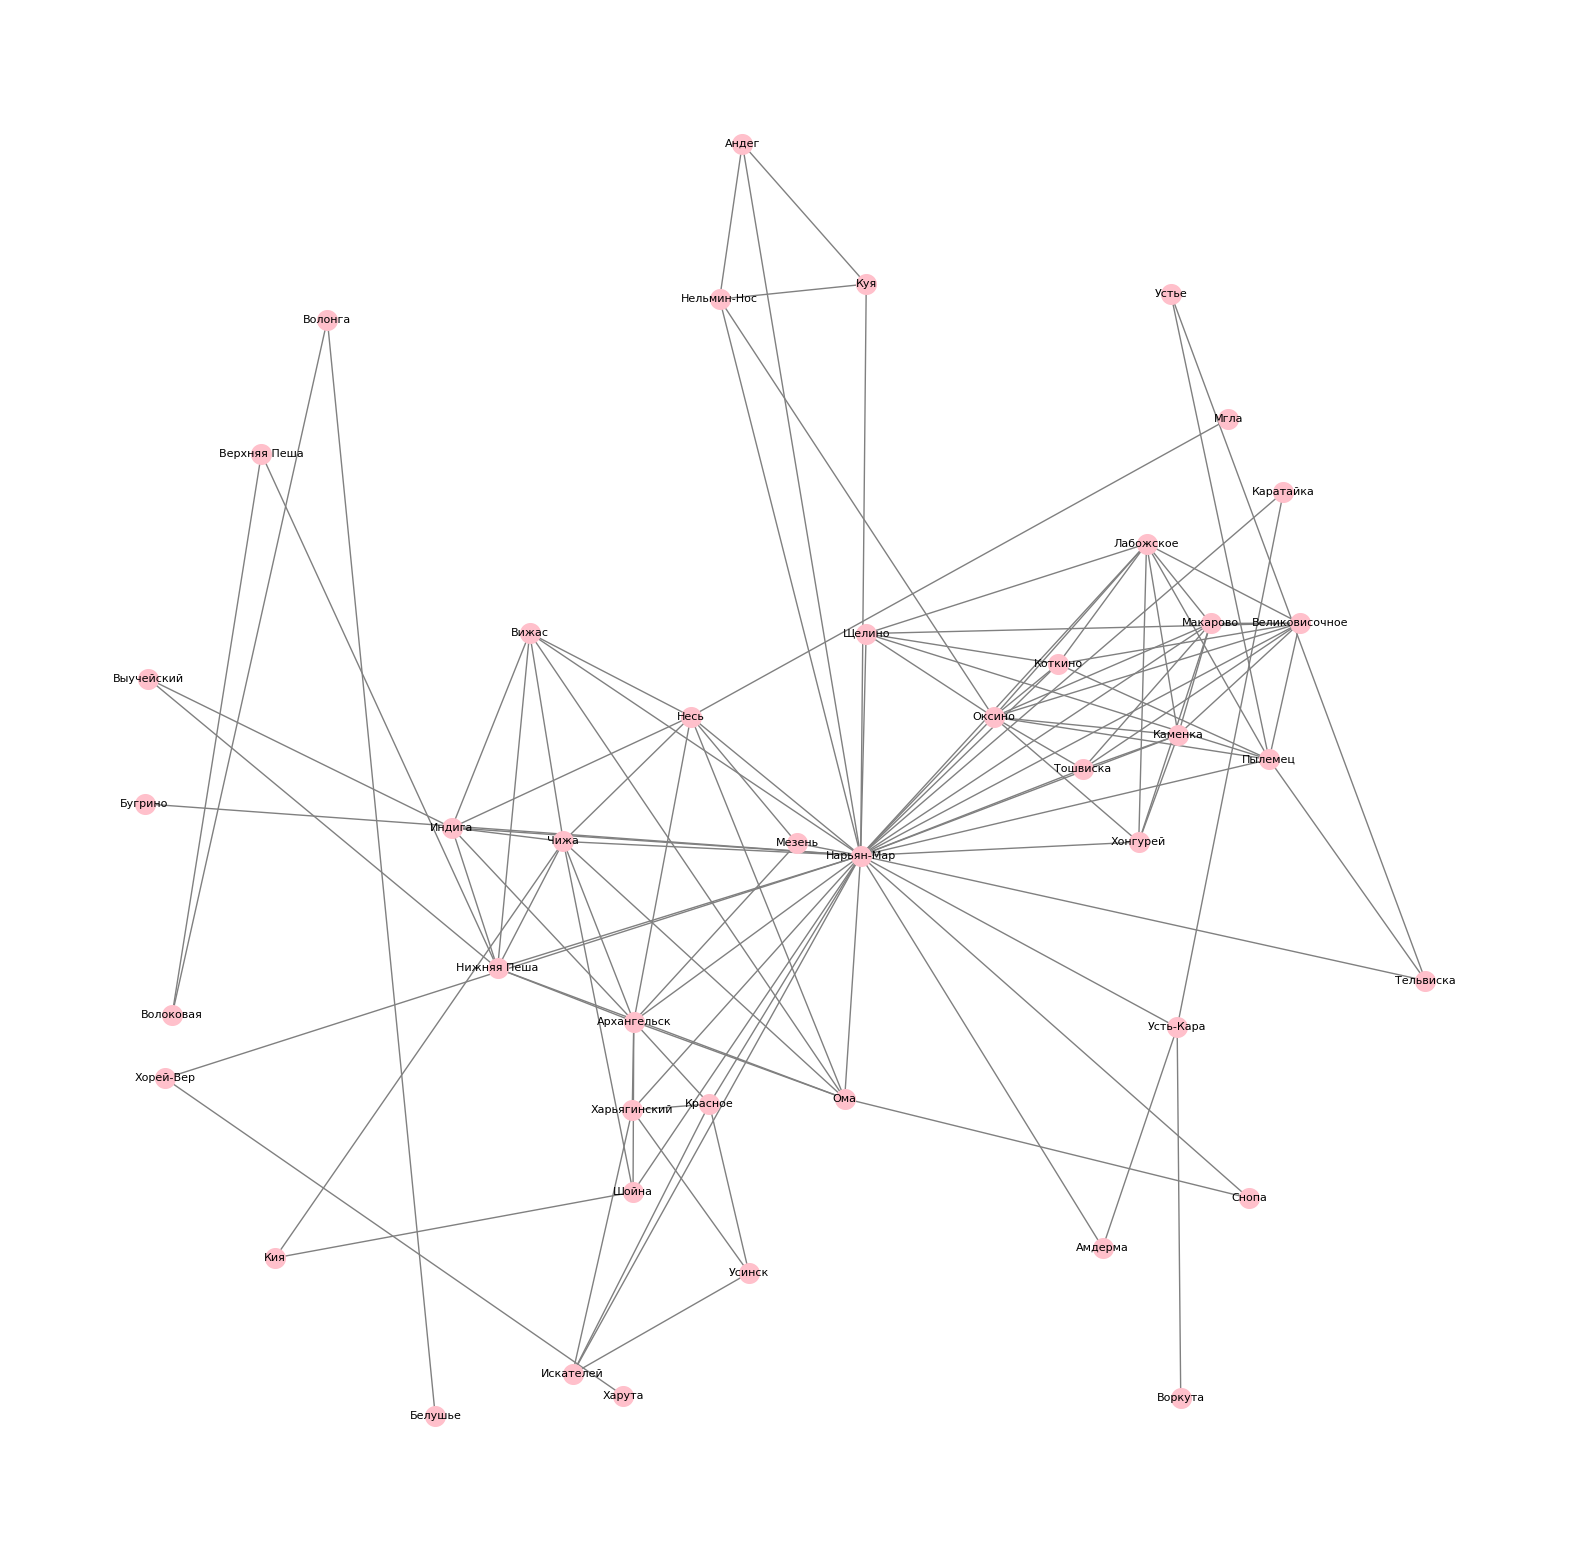

Нарьян-Мар: 32
Оксино: 11
Архангельск: 10
Чижа: 9
Великовисочное: 9
Лабожское: 9
Несь: 8
Нижняя Пеша: 8
Пылемец: 8
Ома: 7


In [ ]:
# Чтение данных из CSV-файла
data_graph_time = min_time_warm

# Создаем пустой ненаправленный граф
G_time = nx.Graph()
for _, row in data_graph_time.iterrows():
    settl1 = row['depart']
    settl2 = row['arrival']
    time = row['min']

    # Если время между деревнями не равно нулю, добавляем ребро
    if time != 0:
        G_time.add_edge(settl1, settl2, weight=time)

# Настройка параметров для визуализации
pos_time = nx.spring_layout(G_time, k=1, scale=4)  # Расположение узлов
edge_labels_time = {(u, v): d['weight'] for u, v, d in G_time.edges(data=True)}  # Метки для рёбер
G_time
plt.figure(figsize=(20,20))  # Размер графика
nx.draw_networkx_nodes(G_time, pos_time, node_size=200, node_color='pink')  # Узлы
nx.draw_networkx_edges(G_time, pos_time, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(G_time, pos_time, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G_time, pos_time, edge_labels=edge_labels, font_size=10)  # Метки рёбер

#Визуализация
plt.axis('off')
plt.show()
# Подсчет количества рёбер для каждого узла
degree_counts = dict(G_time.degree())

# Получение топ-10 узлов с наибольшим количеством рёбер
top_10_nodes = Counter(degree_counts).most_common(10)

# Печать результата
for node, count in top_10_nodes:
    print(f"{node}: {count}")

### Анализ графа

### Анализ кластеров

In [ ]:
data_graph_G = sorted_normalized_df
# Создание ненаправленного графа
G_undirect = nx.Graph()

for _, row in data_graph_G.iterrows():
    vertex1 = row['settl1']  # Первая вершина
    vertex2 = row['settl2']  # Вторая вершина
    gravity_force = row['LocalGravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G_undirect.add_edge(vertex1, vertex2, weight=gravity_force)
G_undirect

### Обратный граф

In [ ]:
import pandas as pd
# Функция для обработки значений
def  gravity_reverse(x):
    if x == 0:
        return 0
    else:
        return 1 / x

# Применяем функцию к столбцу 'Цена'
df_reverse = sorted_normalized_df.copy()
df_reverse['reverse_gravity'] = df_reverse['LocalGravity'].apply(gravity_reverse)

columns_to_drop = ['LocalGravity']
df_reverse.drop(columns_to_drop, axis=1, inplace=True)
#df_reverse.sort_values(by='reverse_gravity', ascending=False)

In [ ]:
#Граф с обратным G (то есть 1/G)
data_reverse = df_reverse
# Создание направленного графа
G_reverse = nx.DiGraph()
for _, row in data_reverse.iterrows():
    source = row['settl2']  # Начальная вершина
    target = row['settl1']  # Конечная вершина
    gravity_force = row['reverse_gravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G_reverse.add_edge(source, target, weight=gravity_force)

### Кластеризация

In [ ]:
# Выполнение модулярной кластеризации. мера качества разбиения графа на сообщества. Она позволяет находить группы узлов, внутри которых связи сильнее, чем снаружи.
partition = cl.best_partition(G_undirect)
mod = cl.modularity(partition, G_undirect)

print("Модулярность:", mod)

# Распечатка сообществ
communities = {}
for node, com_id in partition.items():
    if com_id not in communities:
        communities[com_id] = []
    communities[com_id].append(node)

for com_id, nodes in communities.items():
    print(f"Сообщество {com_id + 1}: {', '.join(nodes)}")

Модулярность: 0.5962858374666827
Сообщество 1: Нарьян-Мар, Тельвиска, Андег, Макарово, Искателей, Коткино, Куя, Бугрино, Красное, Каратайка
Сообщество 2: Шойна, Кия
Сообщество 3: Ома, Снопа, Вижас, Несь, Чижа, Мгла, Мезень, Архангельск
Сообщество 7: Белушье, Волонга, Волоковая, Верхняя Пеша, Нижняя Пеша, Индига, Выучейский
Сообщество 5: Лабожское, Оксино, Пылемец, Великовисочное, Устье, Хонгурей, Нельмин-Нос, Каменка, Тошвиска, Щелино
Сообщество 4: Хорей-Вер, Харута
Сообщество 6: Воркута, Усть-Кара, Амдерма
Сообщество 8: Усинск, Харьягинский


In [ ]:
import networkx as nx
from itertools import combinations

def calculate_centroid_distance(G, community_nodes):
    """
    Функция для расчета среднего расстояния между узлом и всеми остальными узлами в сообществе.

    :param G: Граф NetworkX
    :param community_nodes: Список узлов, принадлежащих одному сообществу
    :return: Словарь, где ключ - узел, значение - среднее расстояние до всех остальных узлов в сообществе
    """
    distances = {}
    for u in community_nodes:
        total_distance = sum(nx.shortest_path_length(G, source=u, target=v) for v in community_nodes if u != v)
        avg_distance = total_distance / (len(community_nodes) - 1)
        distances[u] = avg_distance
    return distances

def find_communities_centroids(G, communities):
    """
    Функция для нахождения центра каждой общины.

    :param G: Граф NetworkX
    :param communities: Словарь, где ключ - ID сообщества, значение - список узлов, принадлежащих этому сообществу
    :return: Словарь, где ключ - ID сообщества, значение - центроид данного сообщества
    """
    centroids = {}
    for com_id, nodes in communities.items():
        distances = calculate_centroid_distance(G, nodes)
        centroid = min(distances, key=lambda x: distances[x])  # Узел с минимальной средней дистанцией
        centroids[com_id] = centroid
    return centroids

# Пример использования функции
centroids = find_communities_centroids(G_undirect, communities)

# Печать результатов
for com_id, centroid in centroids.items():
    print(f"Центроид сообщества {com_id + 1}: {centroid}")

Центроид сообщества 1: Нарьян-Мар
Центроид сообщества 2: Шойна
Центроид сообщества 3: Несь
Центроид сообщества 7: Верхняя Пеша
Центроид сообщества 5: Оксино
Центроид сообщества 4: Хорей-Вер
Центроид сообщества 6: Усть-Кара
Центроид сообщества 8: Усинск


### Выявление частовстречаемых поселений

In [ ]:
# Расчёт степенной центральности
degree = nx.degree_centrality(G)

# Сортируем населённые пункты по уменьшению степенной центральности
sorted_centralities = sorted(degree.items(), key=lambda x: x[1], reverse=True)

important_nodes_sc = [k for k, v in sorted_centralities[:9]]
print(important_nodes_sc)

['Нарьян-Мар', 'Оксино', 'Архангельск', 'Великовисочное', 'Лабожское', 'Чижа', 'Несь', 'Нижняя Пеша', 'Ома']


In [ ]:
#Вершины на концах мостов. Критичны для удаления
bridges = list(nx.bridges(G_undirect))
bridge_nodes = set([u for u, _ in bridges] + [v for _, v in bridges])
print(bridge_nodes)

{'Харута', 'Хорей-Вер', 'Мгла', 'Нарьян-Мар', 'Воркута', 'Волоковая', 'Белушье', 'Верхняя Пеша', 'Нижняя Пеша', 'Несь', 'Усть-Кара', 'Волонга', 'Бугрино'}


In [ ]:
#Только для графа с временем
# Центральность по промежуточности, показывает, насколько часто узел находится на кратчайших путях между другими узлами графа

bc = nx.betweenness_centrality(G_reverse, normalized=False)
sorted_bc = sorted(bc.items(), key=lambda item: item[1], reverse=True)
important_nodes_bc = [k for k, v in sorted_bc[:8]]
print(important_nodes_bc)

['Нарьян-Мар', 'Несь', 'Нижняя Пеша', 'Индига', 'Чижа', 'Пылемец', 'Ома', 'Оксино']


In [ ]:
#Только для графа с временем
#Центральность по близости, показывает, насколько быстро можно достичь всех других узлов графа из данного узла. Можно оценить, насколько населенный пункт является "опорным" с точки зрения доступности остальных точек

cc = nx.closeness_centrality(G_reverse)
sorted_cc = sorted(cc.items(), key=lambda item: item[1], reverse=True)
important_nodes_cc = [k for k, v in sorted_cc[:9]]
print(important_nodes_cc)

['Нарьян-Мар', 'Архангельск', 'Оксино', 'Великовисочное', 'Несь', 'Нижняя Пеша', 'Индига', 'Лабожское', 'Мезень']


In [ ]:
from collections import Counter
def sort_nodes_by_frequency(degree_centrality, closeness_centrality, betweenness_centrality, bridge_endpoints):
    # Преобразуем множества в списки, если они таковыми являются
    if isinstance(degree_centrality, set):
        degree_centrality = list(degree_centrality)
    if isinstance(closeness_centrality, set):
        closeness_centrality = list(closeness_centrality)
    if isinstance(betweenness_centrality, set):
        betweenness_centrality = list(betweenness_centrality)
    if isinstance(bridge_endpoints, set):
        bridge_endpoints = list(bridge_endpoints)

    # Объединяем все списки узлов в один большой список
    all_nodes = degree_centrality + closeness_centrality + betweenness_centrality + bridge_endpoints

    # Подсчитываем частоту встречаемости каждого узла
    node_counts = Counter(all_nodes)

    # Сортируем узлы по убыванию частоты
    sorted_nodes = sorted(node_counts.items(), key=lambda x: (-x[1], x[0]))

    return sorted_nodes

sorted_list = sort_nodes_by_frequency(important_nodes_sc, important_nodes_cc, important_nodes_bc, bridge_nodes, )
print(sorted_list)

[('Нарьян-Мар', 4), ('Несь', 4), ('Нижняя Пеша', 4), ('Оксино', 3), ('Архангельск', 2), ('Великовисочное', 2), ('Индига', 2), ('Лабожское', 2), ('Ома', 2), ('Чижа', 2), ('Белушье', 1), ('Бугрино', 1), ('Верхняя Пеша', 1), ('Волоковая', 1), ('Волонга', 1), ('Воркута', 1), ('Мгла', 1), ('Мезень', 1), ('Пылемец', 1), ('Усть-Кара', 1), ('Харута', 1), ('Хорей-Вер', 1)]


### Поиск минимального остовного дерева (толька на ненаправленных графах)

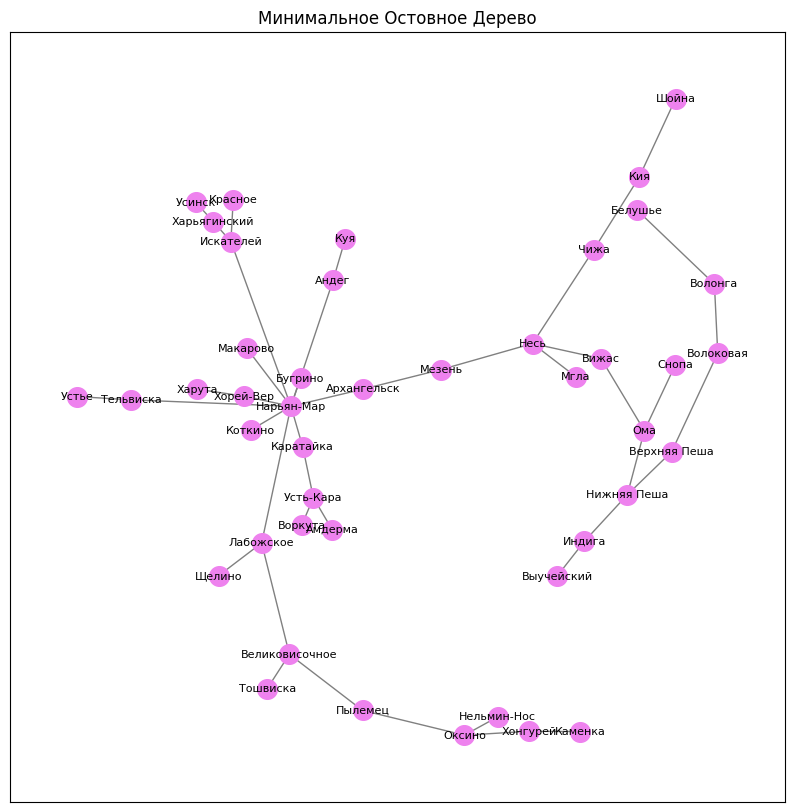

In [ ]:
# Находим минимальное остовное дерево с помощью алгоритма Прима
MST = nx.minimum_spanning_tree(G_time, algorithm='boruvka')
# Визуализация минимального остовного дерева
pos_MST = nx.spring_layout(MST)  # Расположение вершин
labels = nx.get_edge_attributes(MST, 'weight')  # Вес каждого ребра
plt.figure(figsize=(10, 10))  # Размер графика
# Настройка параметров для визуализации
pos_MST = nx.spring_layout(MST)  # Расположение узлов
nx.draw_networkx_nodes(MST, pos_MST, node_size=200, node_color='violet')  # Узлы
nx.draw_networkx_edges(MST, pos_MST, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(MST, pos_MST, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(MST, pos_MST, edge_labels=edge_labels, font_size=10)  # Метки рёбер

plt.title('Минимальное Остовное Дерево')
plt.show()

### Определение узлов-стоков и узлов-источников

In [ ]:
#Определение узлов без входящих/исходящих рёбер (только для направленных графов)
def find_sources_and_sinks(G):
    sources = []
    sinks = []

    # Проверяем каждую вершину
    for node in G.nodes():
        has_incoming_edge = False
        has_outgoing_edge = False

        # Проверка наличия входящих рёбер
        for other_node in G.predecessors(node):
            has_incoming_edge = True
            break

        # Проверка наличия исходящих рёбер
        if len(list(G.successors(node))) > 0:
            has_outgoing_edge = True

        # Добавляем вершину в соответствующий список
        if not has_incoming_edge:
            sources.append(node)
        if not has_outgoing_edge:
            sinks.append(node)

    return sources, sinks

# Получение результатов
sources, sinks = find_sources_and_sinks(G)
print("Только тяготеют:", sources)
print("Только притягивают:", sinks)

Только тяготеют: ['Соколово', 'Мелогора', 'Петрова', 'Петровка', 'Бор', 'Черсова', 'Морозилка', 'Майда', 'Печище', 'Мегра', 'Коршаково', 'Кильца', 'Калино', 'Погорелец', 'Елкино', 'Баковская', 'Карьеполье', 'Лобан', 'Нижа', 'Кепино']
Только притягивают: ['Мезень', 'Азаполье', 'Затон', 'Архангельск']
